**Import Librarires And Dataset**

In [81]:
import warnings
import numpy as np
import pandas as pd
import time

#some settings to show data
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

#import dataset
audit_risk = pd.read_csv("datasets/audit_risk.csv")
trial = pd.read_csv("datasets/trial.csv")

**Show Data**

In [82]:
audit_risk.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Risk.1,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,1,True,NaN,NaN
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,0,True,NaN,NaN
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,0,True,NaN,NaN
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,1,True,NaN,#REF!
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,0,True,NaN,NaN
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,1.0,2.95,0.2,0.590,2,0.2,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0,0,True,NaN,NaN
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,0.2,1.0,44.95,0.6,26.970,2,0.2,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1,1,True,NaN,NaN
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,2.2,7.79,0.4,3.116,2,0.2,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1,1,True,NaN,NaN
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,2.2,7.34,0.4,2.936,2,0.2,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1,1,True,NaN,NaN
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,0.2,1.0,1.93,0.2,0.386,2,0.2,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0,1,False,NaN,NaN


In [83]:
trial.head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


**Lets See Values Of Two Dataset**

In [84]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Risk.1,Unnamed: 29
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000,776.000000,0.0
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041,0.626289,NaN
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741,0.484100,NaN
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,0.000000,NaN
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000,0.000000,NaN
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000,1.000000,NaN
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000,1.000000,NaN
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,1.000000,NaN


In [85]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


**Analysis**

As you can see, two dataset are similarly same expect a bit difference. 
Firsty, SCORE_A AND SCORE_B in trial, multiply 10 with audit_risk Score_A and Score_B values, also that's capital. 
Second, Loss and Risk column in trial, completely different from audit_risk.

First of all, change capital column names like audit_risk columns, then divide by 10 to Score_A and Score_B;

In [86]:
trial.columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
                 'Score_B', 'TOTAL', 'numbers', 'Marks',
                 'Money_Value', 'MONEY_Marks', 'District',
                 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial']

In [87]:
trial['Score_A'] = trial['Score_A'] / 10
trial['Score_B'] = trial['Score_B'] / 10

**Observe two dataset**

In [88]:
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

**Let's merge two dataset with same column**

In [89]:
merged_df = pd.merge(audit_risk, trial, how='outer',
                     on=['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 'Score', 'Score_A', 'Score_B',
                         'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Risk.1', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Marks', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

**Analysis**

As you can see some values in Risk_trial in trial and Risk in audit_risk are different, we can select Risk column in audit_risk because if you will click link https://api.openml.org/d/42931, you can see target value is Risk in audit_risk dataset. So delete that column.

In [90]:
df = merged_df.drop(['Risk_trial'], axis=1)

Check null values

In [91]:
df.isnull().sum()

Sector_score        0
LOCATION_ID         0
PARA_A              0
Score_A             0
Risk_A              0
PARA_B              0
Score_B             0
Risk_B              0
TOTAL               0
numbers             0
Score_B.1           0
Risk_C              0
Money_Value         1
Score_MV            0
Risk_D              0
District_Loss       0
PROB                0
RiSk_E              0
History             0
Prob                0
Risk_F              0
Score               0
Inherent_Risk       0
CONTROL_RISK        0
Detection_Risk      0
Audit_Risk          0
Risk                0
Risk.1              0
Unnamed: 28         0
Unnamed: 29       810
Unnamed: 30       809
Marks               0
MONEY_Marks         0
District            0
Loss                0
LOSS_SCORE          0
History_score       0
dtype: int64

As you can see, Money_Value column has a null value. Set average value,

In [92]:
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

and Detection_Risk column is same value of Risk column, so delete it.

In [93]:
df = df.drop(['Detection_Risk'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

Up to now, everything is good, let's see location id

In [94]:
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

if you iterate to showed values, you will see end of the table there are some non numeric values, LOHARU, NUH and SAFIDON. How much that values in dataset

In [95]:
len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] == 'NUH') | (df["LOCATION_ID"] == 'SAFIDON')])

3

In [96]:
len(df)

810

Only 3 rows we have non numerical rows, so they seem deletable, i deleted it.

In [97]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]

In [98]:
len(df)

807

Also i drop duplicate values,

In [99]:
df = df.drop_duplicates(keep='first')
print(f"Rows: {len(df)}")

Rows: 760


i drop high correlation values;

In [100]:
import seaborn as sns

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr.style.background_gradient(cmap=cm)

ValueError: could not convert string to float: '#REF!'

In [101]:
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D', 'RiSk_E', 'Prob', 'Score', 'CONTROL_RISK', 'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
Risk_A,1.000000,0.163764,0.140733,0.447137,0.117523,0.174539,0.429645,0.149194,0.220566,0.383005,0.287552,0.044639
Risk_B,0.163764,1.000000,0.221772,0.123914,0.079124,0.315631,0.396292,0.185786,0.887493,0.254281,0.311775,0.044428
Risk_C,0.140733,0.221772,1.000000,0.214695,0.154212,0.236598,0.551357,0.250823,0.249262,0.340888,0.491681,0.000101
Risk_D,0.447137,0.123914,0.214695,1.000000,0.032421,0.110535,0.288114,0.068605,0.333676,0.253396,0.390079,0.023952
RiSk_E,0.117523,0.079124,0.154212,0.032421,1.000000,0.123176,0.234282,0.728255,0.203134,0.406693,0.102460,0.369300
Prob,0.174539,0.315631,0.236598,0.110535,0.123176,1.000000,0.442549,0.642598,0.430811,0.297511,0.333109,0.103762
Score,0.429645,0.396292,0.551357,0.288114,0.234282,0.442549,1.000000,0.354491,0.332387,0.784615,0.756508,0.155261
CONTROL_RISK,0.149194,0.185786,0.250823,0.068605,0.728255,0.642598,0.354491,1.000000,0.358037,0.412260,0.215473,0.277546
Audit_Risk,0.220566,0.887493,0.249262,0.333676,0.203134,0.430811,0.332387,0.358037,1.000000,0.216200,0.290696,0.048736
Risk,0.383005,0.254281,0.340888,0.253396,0.406693,0.297511,0.784615,0.412260,0.216200,1.000000,0.687661,0.170357


In [102]:
df

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
0,2.508,0.500,1.0,0.676,0.4,0.2,2.4,0.4,1.7148,1,2,0
1,0.000,0.966,1.0,0.188,0.4,0.2,2.0,0.4,0.5108,0,2,0
2,0.102,0.046,1.0,0.000,0.4,0.2,2.0,0.4,0.3096,0,2,0
3,0.000,6.480,3.6,7.050,0.4,0.2,4.4,0.4,3.5060,1,6,0
4,0.000,0.016,1.0,0.000,0.4,0.2,2.0,0.4,0.2832,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.150,0.090,1.0,0.000,0.4,0.2,2.0,0.4,0.3280,0,2,0
806,0.094,0.074,1.0,0.000,0.4,0.2,2.0,0.4,0.3136,0,2,0
807,0.048,0.008,1.0,0.000,0.4,0.2,2.0,0.4,0.2912,0,2,0
808,0.040,0.000,1.0,0.000,0.4,0.2,2.0,0.4,0.2880,0,2,0


# Data Clean Operation Is Done

# I will Implement Knn

In [103]:
import math

# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return math.sqrt(np.sum((x1 - x2) ** 2))

In [104]:
# Define the KNN function
def knn_classification_with_euclidean_distance(X_train, y_train, X_test, k):
    # List to store the predicted labels for the test set
    y_pred = []
    distances = []
    
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            # Calculate the distance between the two points using euclidean_distance func where I defined above section
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))

        distances.sort()
        neighbors = distances[:k] # Get the k nearest neighbors

        counts = {} # Count the votes for each class
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1

        max_count = max(counts, key=counts.get) # Get the class with the most votes
        y_pred.append(max_count)

    return y_pred

In [105]:
# Define a function to calculate the Manhattan distance between two points
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [106]:
def knn_regressor_with_manhattan_distance(X_train, y_train, X_test, k):
    y_pred = []
    distances = []
    
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            # Calculate the distance between the two points using manhattan_distance func where I defined above section
            dist = manhattan_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))

        distances.sort()
        neighbors = distances[:k]# Get the k nearest neighbors
        
        mean_val = np.mean(neighbors)# Get the mean from the neighbors
        y_pred.append(mean_val)

    return y_pred

**I finished preprocessing to data. I will go to implementing functions, start Part1** 

# PART 1

In [107]:
from sklearn.model_selection import train_test_split

class_df = df.drop("Audit_Risk", axis=1)
classification_X = class_df.drop(["Risk"], axis=1)
classification_y = class_df["Risk"]

**I am seperate my data for train %70 and test %30, so i will use train_test_split func in model_selection library**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)

**KNN Accuracy for k = 3 without k-fold**

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays for using in knn_classification_with_euclidean_distance func
y_train = np.array(y_train)
y_test = np.array(y_test)

start_time = time.time() # i calculate prediction performance via using start_time and end_time 
y_pred = knn_classification_with_euclidean_distance(X_train_scaled, y_train, X_test_scaled, 3)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': 3, 'Accuracy': accuracy}, index=[0])
print(f"k value: {3}, where accuracy is: {accuracy}")


k value: 3, where accuracy is: 0.6096491228070176


**Find Confusion Matrix**

In [110]:
from sklearn.metrics import confusion_matrix

y_pred = knn_classification_with_euclidean_distance(X_train_scaled, y_train, X_test_scaled, 3)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,0,136
1,89,3,92
All,225,3,228


**Find Confusion Matrix With K-fold Cross Validation**

In [111]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store accuracy scores & confusion_matrices for each fold
accuracy_scores = []
confusion_matrices = []

# Perform k-fold cross-validation via kf.split(X_train_scaled), this function give me an indexes subset of X_train_scaled actualy X_train
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    y_pred_fold = knn_classification_with_euclidean_distance(X_train_fold, y_train_fold, X_val_fold, 3)

    # Calculate accuracy and confusion_matrix for current fold
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    cm = confusion_matrix(y_val_fold, y_pred_fold)

    # Store accuracy score and confusion_matrix
    accuracy_scores.append(accuracy)
    confusion_matrices.append(cm)

**Classification Accuracy Performance**

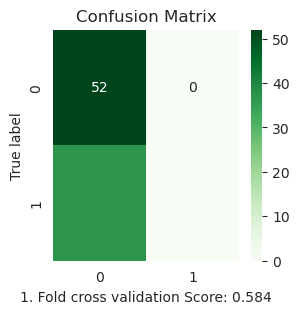

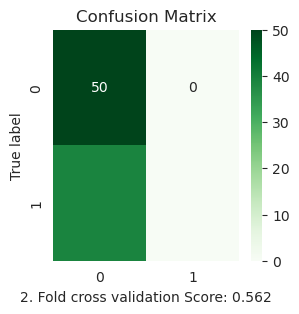

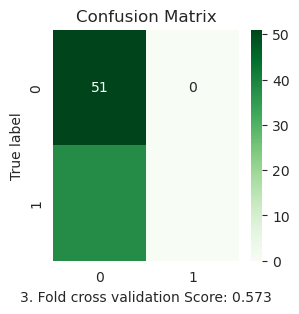

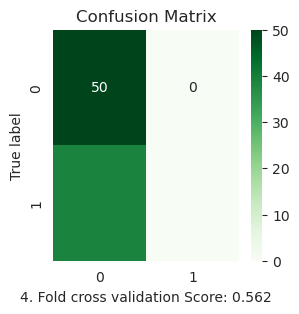

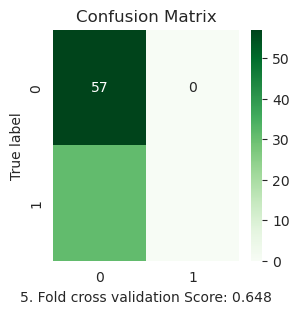

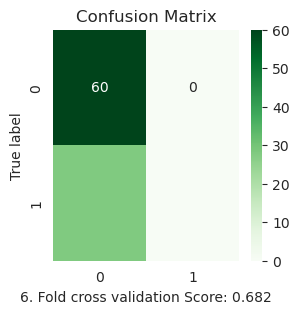

Average accuracy: 0.6017407218249914


In [112]:
for i, score in enumerate(accuracy_scores):
    plt.figure(figsize=(3, 3))
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    i+=1
    plt.xlabel(f'{i}. Fold cross validation Score: {score:.3f}')
    plt.plot()

plt.show()

# Calculate average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print(f"Average accuracy: {avg_accuracy}")

**Runtime Performance**
As you can see to above plot graphics, we understood that last score is higher than others.

In [113]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.778159 seconds


# PART 2

In [114]:
bike = pd.DataFrame(pd.read_csv("datasets/day.csv"))
print(bike.head())
print(bike.info())
print(bike.describe())
print(bike.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

# Conclusion of Data Analysis

Dataset has 730 rows and 16 columns.
Except one column, all others are either float or integer type.
One column is date type.

Looking at the data, it seems to be some fields that are categorical, but in integer/float type.
We will analyse to convert them to categorical as integer.

In [115]:
round(100 * (bike.isnull().sum() / len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [116]:
round((bike.isnull().sum(axis=1) / len(bike)) * 100, 2).sort_values(ascending=False)

730    0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
Length: 731, dtype: float64

**Analysis**

There are no missing / Null values either in columns or rows

In [117]:
bike_dup = bike.copy()
bike_dup = bike_dup.drop_duplicates(keep='first')
# we can assume same operation like this => bike_dup.drop_duplicates(subset=None, inplace=True)

print(bike_dup.shape)
print(bike.shape)

(731, 16)
(731, 16)


**Analysis**
The shape after running the drop duplicate command is same as the original dataframe.
Hence we can conclude that there were zero duplicate values in the dataset.

In [118]:
bike_dummy = bike.iloc[:, 1:16]

for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
2012-12-31    1
2011-01-01    1
2011-01-02    1
2011-01-03    1
2011-01-04    1
             ..
2011-01-31    1
2011-02-01    1
2011-02-02    1
2011-02-03    1
2011-02-04    1
Name: count, Length: 731, dtype: int64 



season
3    188
2    184
1    181
4    178
Name: count, dtype: int64 



yr
1    366
0    365
Name: count, dtype: int64 



mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64 



holiday
0    710
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64 



workingday
1    500
0    231
Name: count, dtype: int64 



weathersit
1    463
2    247
3     21
Name: count, dtype: int64 



temp
0.265833    5
0.635000    5
0.710833    4
0.484167    4
0.649167    4
           ..
0.544167    1
0.587500    1
0.545833    1
0.477500    1
0.440000    1
Name: count, Length: 499, dtype: int64 



atemp
0.654688    4
0

**As you can see on above code output;**

instant, dteday, casual and registered columns are nonessential, so we can remove these columns. Because;

*instant* : its index,
*dteday* : it has the date,
*casual & registered* : i dont consider the columns that specify bike counts by customer categories since our objective is to determine the total bike count. Furthermore, we've introduced a new variable to represent the proportion of different customer types.

In [119]:
bike_new = bike[
    ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
# bike_new = bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']] we can see that columns are numerical

In [120]:
bike_new.info()
bike_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


**Creating Dummy Variables**
I can drop all categorical data, so ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] columns are usefull. But i can create dummy variable. 
Dummy variables are usefull because they allow us to include categorical variables in our analysis, which would otherwise be difficult to include due to their non-numeric nature. 
They can also help us to control for confounding factors and improve the validity of our results.

In [121]:
bike_new['season'] = bike_new['season'].astype('category')
bike_new['weathersit'] = bike_new['weathersit'].astype('category')
bike_new['mnth'] = bike_new['mnth'].astype('category')
bike_new['weekday'] = bike_new['weekday'].astype('category')

In [122]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    bool   
 9   season_3      731 non-null    bool   
 10  season_4      731 non-null    bool   
 11  mnth_2        731 non-null    bool   
 12  mnth_3        731 non-null    bool   
 13  mnth_4        731 non-null    bool   
 14  mnth_5        731 non-null    bool   
 15  mnth_6        731 non-null    bool   
 16  mnth_7        731 non-null    bool   
 17  mnth_8        731 non-null    bool   
 18  mnth_9        731 non-null    

# Go

Splitting the data to Train and Test: - I am splitting the data into TRAIN and TEST (70:30 ratio), now,

In [123]:
from sklearn.model_selection import train_test_split

regression_df = bike_new
regression_X = regression_df.drop(["cnt"], axis=1)
regression_y = regression_df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(regression_X, regression_y, test_size=0.3, random_state=42)

**Perform K-NN for k = 3 With K-fold Cross Validation**

In [124]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays for using in knn_classification_with_euclidean_distance func
y_train = np.array(y_train)
y_test = np.array(y_test)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

r2_values = []
mse_values = []
rmse_values = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


    start_time = time.time()
    # Predict using KNN regression
    y_pred_fold = knn_regressor_with_manhattan_distance(X_train_fold, y_train_fold, X_val_fold, 3)
    end_time = time.time()
    
    # mean squared error, r2 score
    # r2 = r2_score(y_val_fold, y_pred_fold)
    mse = mean_squared_error(y_val_fold, y_pred_fold)
    rmse = np.sqrt(mse)

    # r2_values.append(r2)
    mse_values.append(mse)
    rmse_values.append(rmse)
    
# Calculate average mean
# print("Average R2 Score:", np.mean(r2_values))
print(f"Average Mean Squared Error: {np.mean(mse_values)}")
print(f"Average Root Mean Squared error: {np.mean(rmse_values)}")

Average Mean Squared Error: 8047875.08559565
Average Root Mean Squared error: 2834.9880144446765


In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
k_neighbors_predictions = knn.predict(X_test_scaled)
accuracy_score(y_test, k_neighbors_predictions)

0.0

**Runtime Performance**

Mean Squared Error (MSE) is a metric commonly used to evaluate the performance of a regression model. It measures the average of the squares of the errors, 
which are the differences between actual values and predicted values. 

MSE quantifies the average squared difference between actual values and predicted values. A smaller MSE indicates better agreement between the predicted and actual values, 
whereas a larger MSE suggests poorer model performance.

In [126]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.265317 seconds


# PART 3

In [127]:
from sklearn import svm

class_df = df.drop("Audit_Risk", axis=1)
classification_X = class_df.drop(["Risk"], axis=1)
classification_y = class_df["Risk"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)

**KNN Accuracy for k = 3 without k-fold**

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

start_time = time.time()
clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(X_train, y_train)
end_time = time.time()

y_pred = clf.predict(X_test)

In [130]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9868421052631579


**Find Confusion Matrix**

In [131]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,0,136
1,3,89,92
All,139,89,228


**Find Confusion Matrix & And Roc Values For Each K-fold**

In [132]:
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

kf = KFold(n_splits=6, shuffle=True, random_state=42)

# List to store scores for each fold
rocs = []
roc_aucs = []
confusion_matrices = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    clf = svm.SVC(kernel='linear')  # Linear Kernel
    

    clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_val_fold)
    end_time = time.time()
    
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    cm = confusion_matrix(y_val_fold, y_pred_fold)
    confusion_matrices.append(cm)

    ######### IMPORTANT INFO ###########
    # The optimal cut-off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################

    i = np.arange(len(tpr))  # index for df
    roc = pd.DataFrame(
        {'fpr': pd.Series(fpr, index=i),
         'tpr': pd.Series(tpr, index=i),
         '1-fpr': pd.Series(1 - fpr, index=i),
         'tf': pd.Series(tpr - (1 - fpr), index=i),
         'thresholds': pd.Series(thresholds, index=i)
         })

    rocs.append(roc)

**Show Optimum threshold & ROC Curves** 

1. ROC Optimum threshold= [1]


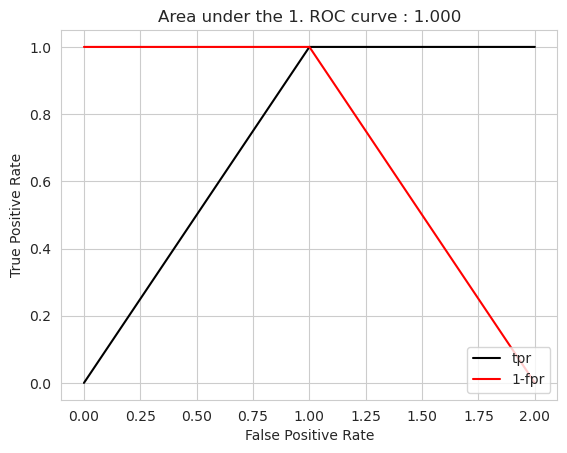

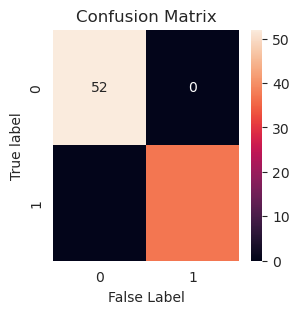

2. ROC Optimum threshold= [1]


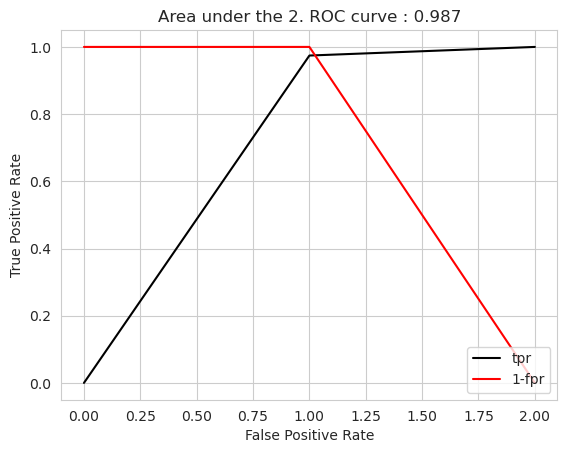

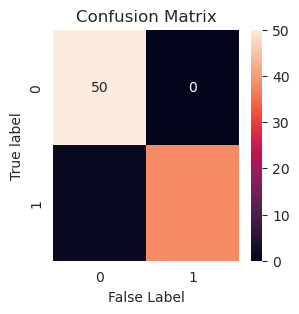

3. ROC Optimum threshold= [1]


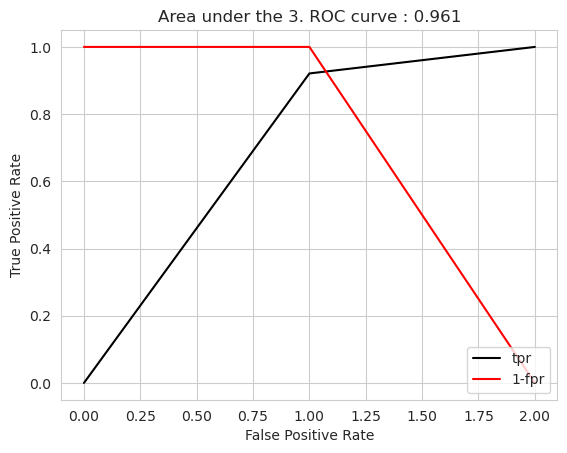

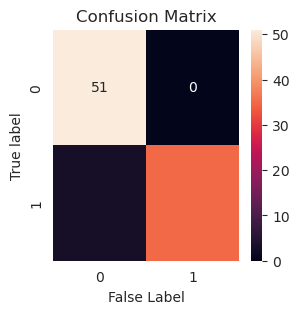

4. ROC Optimum threshold= [1]


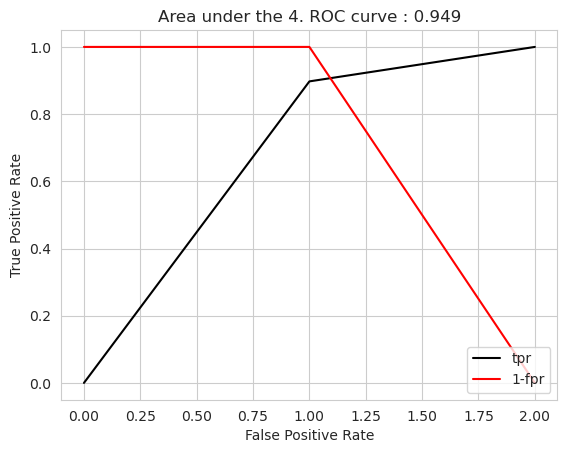

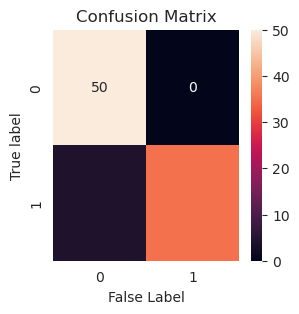

5. ROC Optimum threshold= [1]


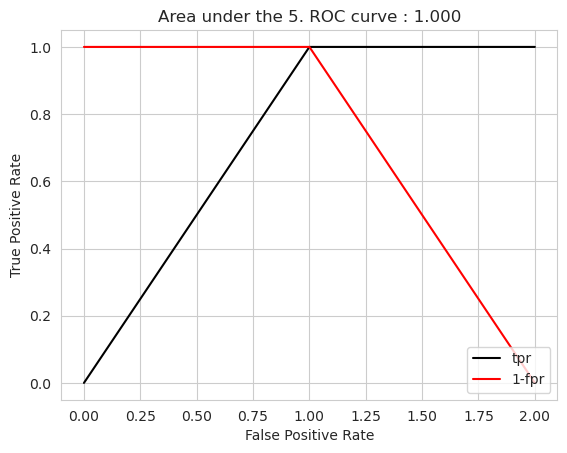

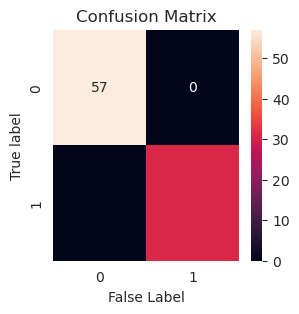

6. ROC Optimum threshold= [1]


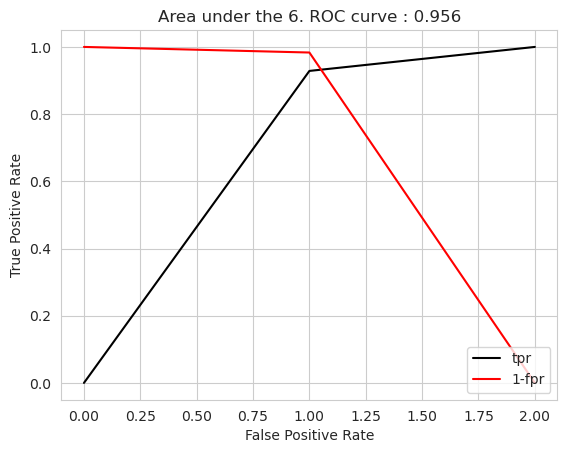

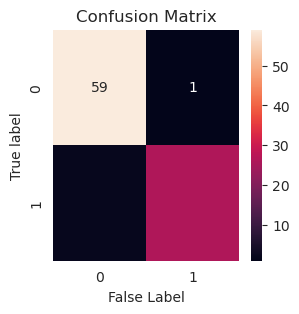

In [133]:
 for i, roc in enumerate(rocs):
    # Plot tpr vs 1-fpr
    fig, ax = pl.subplots()
    pl.plot(roc['tpr'], color='black')
    pl.plot(roc['1-fpr'], color='red')
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(f"Area under the {i + 1}. ROC curve : {roc_aucs[i]:.3f}")
    pl.legend(["tpr", "1-fpr"], loc="lower right")

    plt.figure(figsize=(3, 3))
    sns.heatmap(confusion_matrices[i], annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('False Label')
    plt.plot()

    roc_optimum_threshold = roc.iloc[(roc.tf - 0).abs().argsort()[:1]]
    print(f"{i + 1}. ROC Optimum threshold= {list(roc_optimum_threshold['thresholds'])}")

    plt.show()
    ax.set_xticklabels([])

**Runtime Performance**

Area Under Curve (AUC) is closer to 1 are more good, robust etc model than others. So as you can see, i get the 1 which optimal thresold 1 to.

In [134]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.108072 seconds


# PART 4

**Get Data**

In [135]:
from sklearn.model_selection import train_test_split

regression_df = bike_new
regression_X = regression_df.drop(["cnt"], axis=1)
regression_y = regression_df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(regression_X, regression_y, test_size=0.3, random_state=42)

**Regressor based on the linear SVM**

In [136]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR(kernel='linear', C=6)
start_time = time.time()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
end_time = time.time()

#r2 score, mean squared error & rmse
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Single R2 Score (Before k-fold cross validation): {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Root Mean Squared error: {rmse:.3f}')
print(f'Test Score: {svr.score(X_test, y_test):.3f}')
print(f'Train Score: {svr.score(X_train, y_train):.3f}')

Single R2 Score (Before k-fold cross validation): 0.817
Mean Squared Error: 727226.243
Root Mean Squared error: 852.776
Test Score: 0.817
Train Score: 0.804


In [137]:
# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Initialize the Linear SVR model
svr = SVR(kernel='linear', C=6)
kf = KFold(n_splits=6, shuffle=True, random_state=42)

r2_values = []
mse_values = []
rmse_values = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Predict using LSVM regression
    svr.fit(X_train_fold, y_train_fold)
    y_pred_fold = svr.predict(X_val_fold)

    # mean squared error, r2 score
    r2 = r2_score(y_val_fold, y_pred_fold)
    mse = mean_squared_error(y_val_fold, y_pred_fold)
    rmse = np.sqrt(mse)

    r2_values.append(r2)
    mse_values.append(mse)
    rmse_values.append(rmse)

# Mean squared error and R2 scores
mse_mean = np.mean(mse_values)
r2_mean = np.mean(r2_values)

print(f'Mean Squared Error: {mse_mean:.3f}')
print(f'R2 Score Mean After 6-fold cross validation: {r2_mean:.3f}')

Mean Squared Error: 798905.194
R2 Score Mean After 6-fold cross validation: 0.778


# Final Test

In [138]:
y_pred = svr.predict(X_test)
print(f"Final R2 Score After k-fold cross validation with test data:  {r2_score(y_test, y_pred):.3f}")

Final R2 Score After k-fold cross validation with test data:  0.801


**Runtime Performance**

Firstly, I find mse which after k-fold cross validation is better than before one.  

In [139]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.008590 seconds


# PART 5

In [140]:
from sklearn import svm

class_df = df.drop("Audit_Risk", axis=1)
classification_X = class_df.drop(["Risk"], axis=1)
classification_y = class_df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

clf = svm.SVC(kernel='rbf')  # Rbf Kernel
start_time = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()

In [141]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8552631578947368


**Find Confusion Matrix**

In [142]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,0,136
1,33,59,92
All,169,59,228


**Find Confusion Matrix & And Roc Values For Each K-fold**

In [143]:
import numpy as np
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

kf = KFold(n_splits=6, shuffle=True, random_state=42)

# List to store scores for each fold
rocs = []
roc_aucs = []
confusion_matrices = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    clf = svm.SVC(kernel='rbf')  # Linear Kernel
    clf.fit(X_train_fold, y_train_fold)
    y_pred_fold = clf.predict(X_val_fold)

    fpr, tpr, thresholds = roc_curve(y_val_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    cm = confusion_matrix(y_val_fold, y_pred_fold)
    confusion_matrices.append(cm)

    ######### IMPORTANT INFO ###########
    # The optimal cut-off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################

    i = np.arange(len(tpr))  # index for df
    roc = pd.DataFrame(
        {'fpr': pd.Series(fpr, index=i),
         'tpr': pd.Series(tpr, index=i),
         '1-fpr': pd.Series(1 - fpr, index=i),
         'tf': pd.Series(tpr - (1 - fpr), index=i),
         'thresholds': pd.Series(thresholds, index=i)
         })

    rocs.append(roc)

**Show Optimum threshold & ROC Curves** 

1-fold ROC Optimum threshold= [1]
2-fold ROC Optimum threshold= [1]
3-fold ROC Optimum threshold= [1]
4-fold ROC Optimum threshold= [1]
5-fold ROC Optimum threshold= [1]
6-fold ROC Optimum threshold= [1]


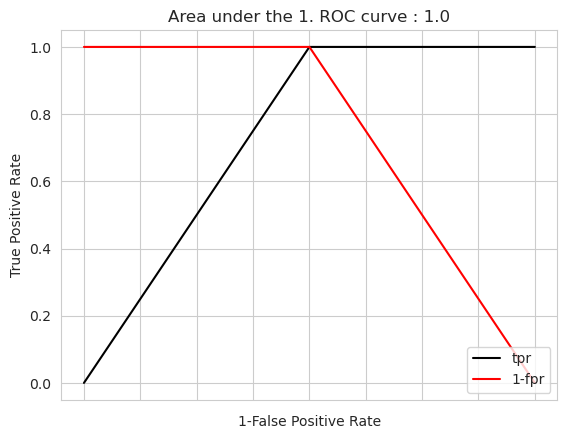

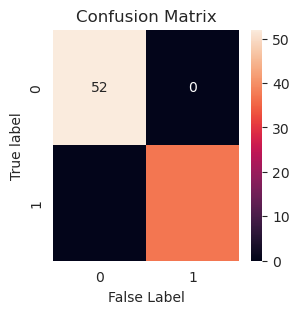

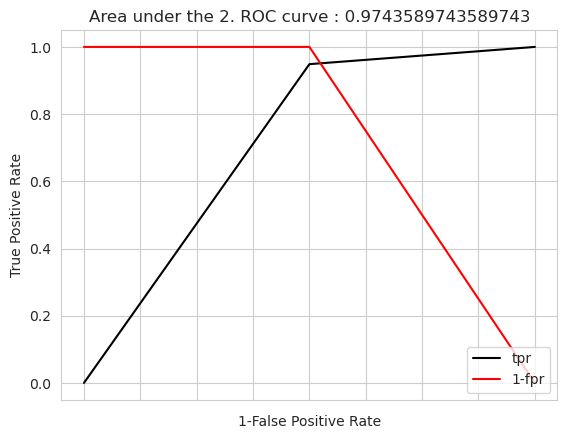

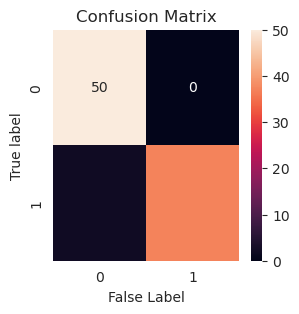

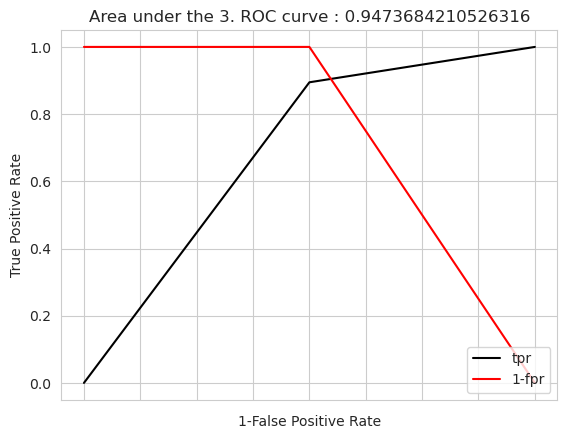

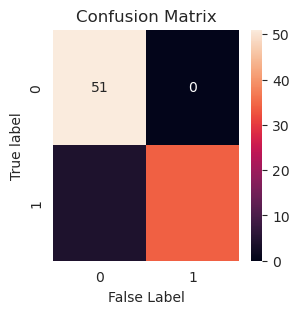

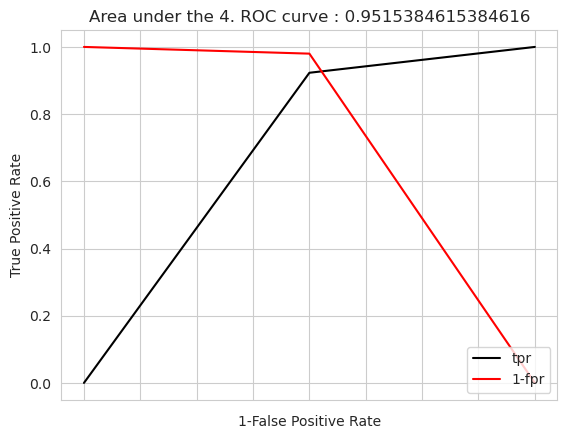

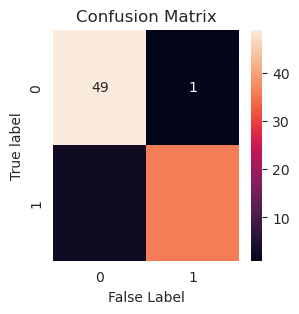

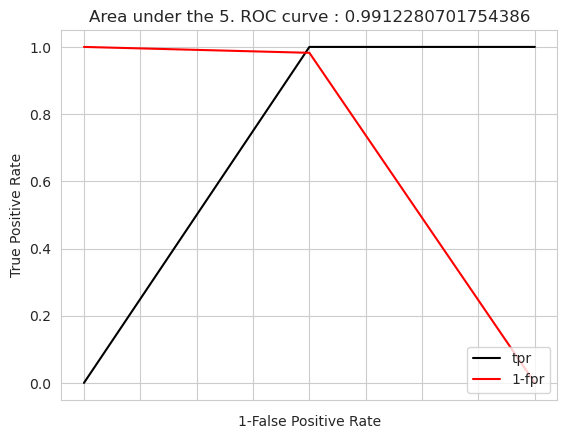

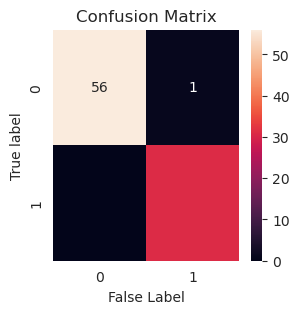

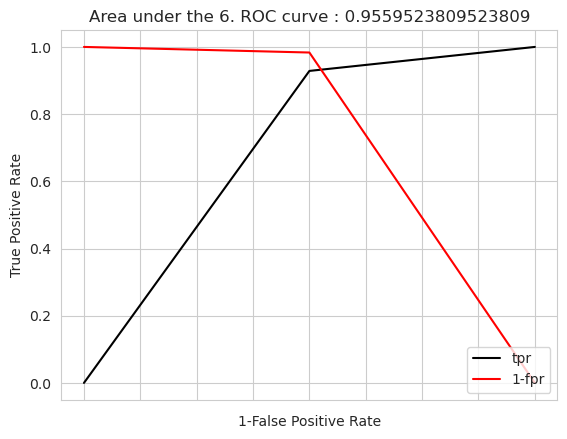

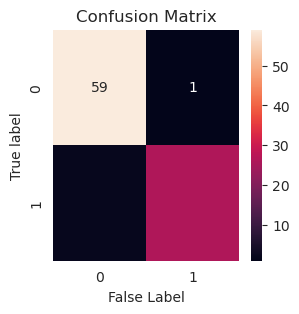

In [144]:
 for i, roc in enumerate(rocs):
    # Plot tpr vs 1-fpr
    fig, ax = pl.subplots()
    pl.plot(roc['tpr'], color='black')
    pl.plot(roc['1-fpr'], color='red')
    pl.xlabel('1-False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(f"Area under the {i + 1}. ROC curve : {roc_aucs[i]}")
    pl.legend(["tpr", "1-fpr"], loc="lower right")

    plt.figure(figsize=(3, 3))
    sns.heatmap(confusion_matrices[i], annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('False Label')
    plt.plot()
    ax.set_xticklabels([])

    roc_optimum_threshold = roc.iloc[(roc.tf - 0).abs().argsort()[:1]]
    print(f"{i + 1}-fold ROC Optimum threshold= {list(roc_optimum_threshold['thresholds'])}")

plt.show()


**Runtime Performance**

In [145]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.005293 seconds


# PART 6

In [146]:
from sklearn.tree import DecisionTreeClassifier

class_df = df.drop("Audit_Risk", axis=1)
classification_X = class_df.drop(["Risk"], axis=1)
classification_y = class_df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=1)
start_time = time.time()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
end_time = time.time()

accuracy = dt.score(X_test, y_test)  # we can also find accuracy: print(accuracy_score(y_test, y_pred))
print(f'Test set accuracy: {accuracy:.3f}')

Test set accuracy: 0.982


**Pruning Strategies**

I am try to use min_impurity_decrease and max_depth parameters. 
The **min_impurity_decrease** parameter controls for how much the impurity of a node must be reduced by splitting it, and the **max_depth** parameter controls the maximum depth of the tree. 
By setting these parameters, appropriately, i can prune the tree to prevent it from overfitting the data.

**Different 2 Pruning Strategies**

In [147]:
# first second pruning strategies using min_impurity_decrease
dt_min_impurity = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=1)
dt_min_impurity.fit(X_train, y_train)

# second pruning strategies using max_depth
dt_max_depth = DecisionTreeClassifier(max_depth=5, random_state=1)
dt_max_depth.fit(X_train, y_train)

print(f'Test set accuracy (min_impurity_decrease): {dt_min_impurity.score(X_test, y_test):.3f}')
print(f'Test set accuracy (max_depth): {dt_max_depth.score(X_test, y_test):.3f}')

Test set accuracy (min_impurity_decrease): 0.969
Test set accuracy (max_depth): 0.974


**Apply K-Fold Cross Validation**

In [148]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
accuracy_scores = []
fold_number = 1

X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    dt = DecisionTreeClassifier(random_state=1)
    dt.fit(X_train_fold, y_train_fold)
    accuracy = dt.score(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)
    
    print(f"{fold_number}. Fold Cross Validation accuracy: {accuracy}")
    fold_number +=1

print(f"\nK-Fold Cross Validation accuracy mean: {np.mean(accuracy_scores)}")

1. Fold Cross Validation accuracy: 1.0
2. Fold Cross Validation accuracy: 0.9775280898876404
3. Fold Cross Validation accuracy: 0.9775280898876404
4. Fold Cross Validation accuracy: 0.9775280898876404
5. Fold Cross Validation accuracy: 0.9886363636363636
6. Fold Cross Validation accuracy: 0.9659090909090909

K-Fold Cross Validation accuracy mean: 0.9811882873680626


In [149]:
from sklearn.tree import _tree

def tree_to_set_of_rules(tree, features):
    tree_ = tree.tree_
    feature_name = [
        features[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def predict({}):".format(", ".join(features)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold, 2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold, 2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            # print("{}return {} {} {}".format(indent, tree_.value[node], "samples", tree_.n_node_samples[node])) #> if you wanna see classification
            print("{}return {} {}".format(indent, tree_.n_node_samples[node], "samples"))  # I will use this, because a bit simple and clean

    recurse(0, 1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(classification_X, classification_y, test_size=0.3, random_state=42)
model = dt.fit(X_train, y_train)
tree_to_set_of_rules(dt, X_train.columns)

def predict(Risk_A, Risk_B, Risk_C, Risk_D, RiSk_E, Prob, Score, CONTROL_RISK, MONEY_Marks, Loss):
    if Score <= 2.3:
        return 260 samples
    else:  # if Score > 2.3
        if Risk_D <= 0.43:
            if CONTROL_RISK <= 0.6:
                if Risk_A <= 3.62:
                    if Risk_B <= 3.49:
                        if Score <= 3.5:
                            if Risk_B <= 2.62:
                                return 49 samples
                            else:  # if Risk_B > 2.62
                                if Score <= 3.1:
                                    return 1 samples
                                else:  # if Score > 3.1
                                    return 4 samples
                        else:  # if Score > 3.5
                            return 1 samples
                    else:  # if Risk_B > 3.49
                        return 6 samples
                else:  # if Risk_A > 3.62
                    return 11 samples
            else:  # if C

In [151]:
# to compare my output and library function's output,
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_6 <= 2.30
|   |--- class: 0
|--- feature_6 >  2.30
|   |--- feature_3 <= 0.43
|   |   |--- feature_7 <= 0.60
|   |   |   |--- feature_0 <= 3.62
|   |   |   |   |--- feature_1 <= 3.49
|   |   |   |   |   |--- feature_6 <= 3.50
|   |   |   |   |   |   |--- feature_1 <= 2.62
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  2.62
|   |   |   |   |   |   |   |--- feature_6 <= 3.10
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  3.10
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  3.49
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  3.62
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.60
|   |   |   |--- feature_7 <= 1.00
|   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.02
|   |   |   |   |   |--- class: 1


**Report**

In [152]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.001966 seconds


# PART 7

In [153]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

regression_df = bike_new
regression_X = regression_df.drop(["cnt"], axis=1)
regression_y = regression_df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(regression_X, regression_y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

# Detect single runtime performance
dt = DecisionTreeRegressor(random_state=1, max_depth=5, min_impurity_decrease=0.1)
start_time = time.time()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
end_time = time.time()

**Apply K-Fold Cross Validation**

In [154]:
fold_number = 1
accuracy_scores = []
kf = KFold(n_splits=6, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    dt = DecisionTreeRegressor(random_state=1, max_depth=5, min_impurity_decrease=0.1)
    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_val_fold)
    
    accuracy = dt.score(X_val_fold, y_val_fold)  # we can also find accuracy: print(accuracy_score(y_test, y_pred))
    print(f"{fold_number}. Fold Cross Validation accuracy: {accuracy}")
    fold_number +=1

print("\n")
tree_to_set_of_rules(dt, regression_X.columns) # we can use again same tree_to_code function

1. Fold Cross Validation accuracy: 0.7899286128857734
2. Fold Cross Validation accuracy: 0.8075311327290042
3. Fold Cross Validation accuracy: 0.7145883614469619
4. Fold Cross Validation accuracy: 0.7193515339416912
5. Fold Cross Validation accuracy: 0.6732596626955536
6. Fold Cross Validation accuracy: 0.7543892769527831


def predict(yr, holiday, workingday, temp, atemp, hum, windspeed, season_2, season_3, season_4, mnth_2, mnth_3, mnth_4, mnth_5, mnth_6, mnth_7, mnth_8, mnth_9, mnth_10, mnth_11, mnth_12, weekday_1, weekday_2, weekday_3, weekday_4, weekday_5, weekday_6, weathersit_2, weathersit_3):
    if temp <= 0.47:
        if atemp <= 0.31:
            if atemp <= 0.23:
                if yr <= 0.5:
                    if hum <= 0.62:
                        return 20 samples
                    else:  # if hum > 0.62
                        return 8 samples
                else:  # if yr > 0.5
                    if hum <= 0.77:
                        return 12 samples
        

**Final Test**

In [155]:
y_pred = dt.predict(X_test)
print(f"Final R2 Score After k-fold cross validation with test data:  {r2_score(y_test, y_pred):.3f}")

Final R2 Score After k-fold cross validation with test data:  0.798


**Performance**
As you see in the above outputs, K-cross validation's predict value is a bit higher than final predeict value.  

In [156]:
print(f'Predict Runtime: {end_time - start_time:.6f} seconds')

Predict Runtime: 0.001210 seconds
